## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
# dataset=pd.read_csv('https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz')
dataset=pd.read_csv("data/LeMonde2003_9classes.csv.gz")

In [2]:
dataset.head(2)

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART


<Axes: xlabel='count', ylabel='category'>

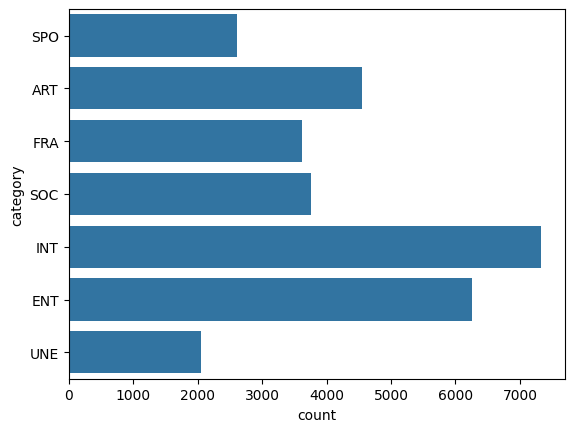

In [3]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE
sns.countplot(data=dataset, y='category')

In [4]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
dataset.sample(2)

text  \
4444   on attendait avec impatience les premières prévisions économiques de l'après-guerre en irak pour savoir si une fois refermée la parenthèse du conflit militaire et donc levées les incertitudes sur sa durée la croissance mondiale avait des chances de repartir l'organisation de coopération et de développement économiques ocde qui réunit 29 pays est la première à se livrer à l'exercice il n'est pas spectaculaire a en croire jean-michel cotis chef économiste de l'organisation la reprise ne le sera pas non plus 2,5 dans la zone euro 1 au japon a peine plus vigoureuse que celle prévue par le fonds monétaire international fmi avant la fin du conflit et il faudra attendre 2004 si le prix du pétrole reste autour de 25 dollars pour voir la croissance de la zone remonter autour de 3 la dernière étude de conjoncture de l'ocde remonte à six mois depuis la croissance s'est révélée décevante la reprise américaine reste fragile et un peu plus faible que prévu et celle de la zone euro n'a pas été à la hauteur de prévisions pourtant modestes les raisons de ce nouvel accès de faiblesse sont nombreuses inquiétudes sur le prix du pétrole anxiété face à la guerre peur du terrorisme perte de confiance dans la gouvernance mondiale cette situation a nui à la confiance des entreprises et des consommateurs et explique la faiblesse généralisée de l'activité du début d'année mais maintenant le choc pétrolier tant redouté n'a pas eu lieu la guerre n'a pas enflammé la région et il faut se résigner à ce que le terrorisme pèse de façon récurrente sur la croissance comme le souligne le rapport les vents contraires qui freinaient la reprise il y a six mois ont perdu de leur intensité d'où vient alors que le rebond demeure hésitant et lent il vient des déséquilibres persistants ainsi que dans certaines économies de l'insuffisance des réformes structurelles répond l'ocde car pour utiles qu'elles soient une reconstruction rapide de l'irak et le retour progressif à plus de sécurité dans le monde ne sauraient se substituer à une authentique dynamique de la croissance économique souligne m. cotis dans la plupart des pays les perspectives budgétaires sont beaucoup plus sombres qu'à la fin des années 90 en raison de la dégradation de la conjoncture de l'augmentation des dépenses publiques et d'une série de réductions d'impôts sans contrepartie sur le plan des dépenses mais aussi en raison d'une action souvent trop tardive face aux pressions budgétaires les déficits publics pour la zone ocde dans son ensemble devraient atteindre 3,5 du pib en 2003 et cette dégradation est d'autant plus préoccupante qu'elle ne peut que s'aggraver par les effets du vieillissement démographique et la lenteur avec laquelle sont réformés les systèmes de retraite et de santé de fait un certain nombre de pays n'ont d'autre choix que d'entamer sans attendre l'assainissement de leurs finances publiques un nouvel assouplissement de la politique budgétaire étant déconseillé c'est la politique monétaire qui selon l'ocde est la mieux placée pour accompagner la reprise et si à ce jour les conditions monétaires semblent adaptées à la situation conjoncturelle des etats-unis une baisse significative du loyer de l'argent est souhaitable dans la zone euro où la croissance devrait rester en dessous du potentiel pendant les prochains trimestres alors que l'inflation ralentira la zone euro où l'ocde constate que les taux de croissance divergent de plus en plus l'allemagne et les pays-bas parmi les gros pays restant en retrait derrière la france et l'espagne les perspectives les plus sombres sont en allemagne où note l'ocde la croissance moyenne sur l'ensemble de l'année devrait être inférieure à 0,5 l'emploi continue de baisser et le chômage de s'aggraver le ralentissement de l'expansion en allemagne rend d'autant plus nécessaire une réforme en profondeur pour accroître la flexibilité des marchés du travail et améliorer les incitations au travail au total l'ocde mise sur une reprise graduelle d

In [5]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import pandas as pd

# # Load stopwords from file
# stopwords = set(x.strip() for x in open('data/stop_word_fr.txt', encoding="utf-8").readlines())

# # Define the categories to visualize
# categories = dataset['category']

# # Set up the figure
# plt.figure(figsize=(15, 10))

# # Generate a word cloud for each category
# for i, cat in enumerate(categories, 1):
#     # Filter the dataset for the current category
#     text = " ".join(dataset[dataset['category'] == cat]['text'])
    
#     # Generate the word cloud
#     word_cloud = WordCloud(
#         width=800, height=400,
#         background_color='white',
#         stopwords=stopwords,
#         colormap='viridis'
#     ).generate(text)
    
#     # Plot the word cloud
#     plt.subplot(3, 3, i)  # Create a subplot (2 rows, 3 columns)
#     plt.imshow(word_cloud, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(f"Word Cloud for {cat}")

# # Show all plots
# plt.tight_layout()
# plt.show()


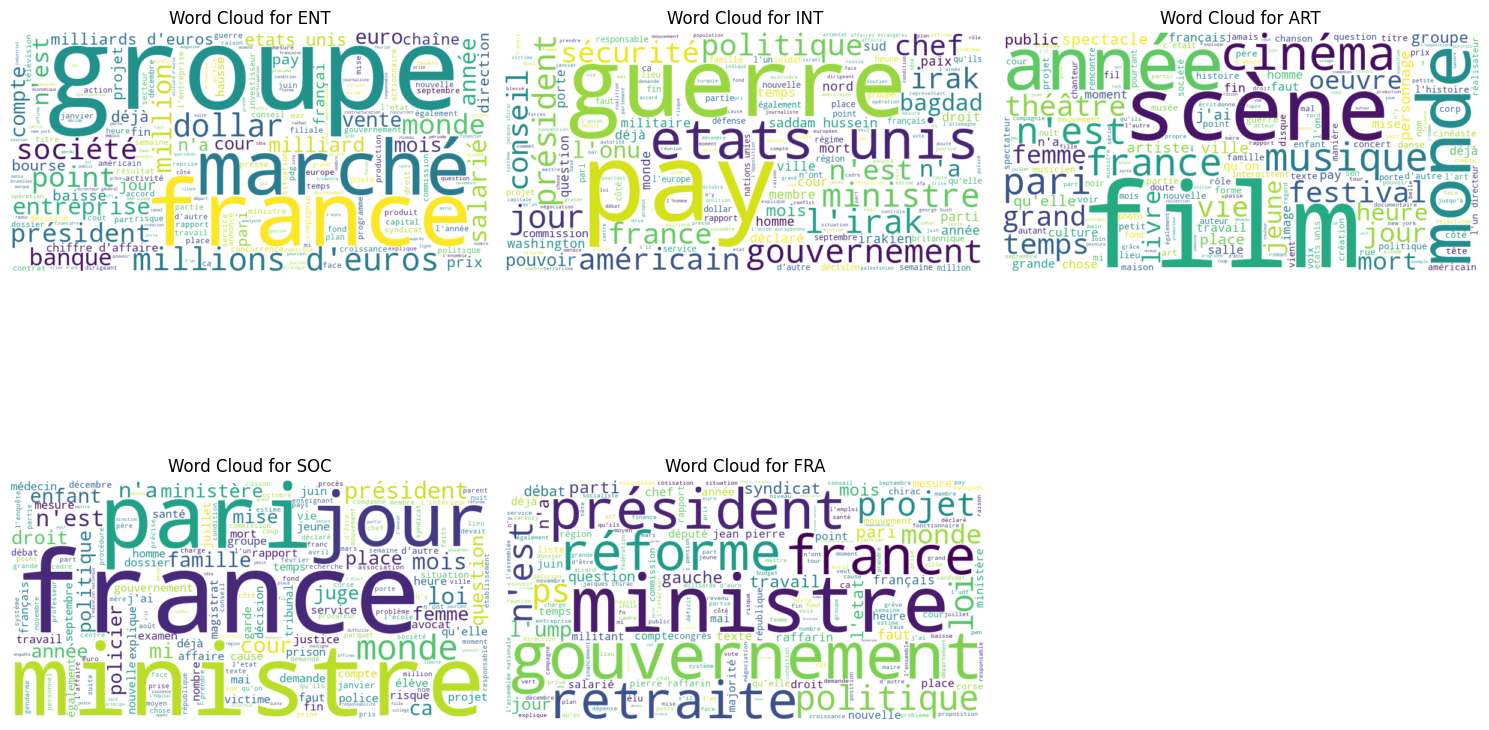

In [6]:
# from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
# plot a word cloud for each category
for i, cat in enumerate(['ENT', 'INT',  'ART', 'SOC', 'FRA'], 1):
 # YOUR CODE HERE
        # Filter the dataset for the current category
    text = " ".join(dataset[dataset['category'] == cat]['text'])
    
    # Generate the word cloud
    word_cloud = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=STOPWORDS,
        colormap='viridis'
    ).generate(text)
    
    # Plot the word cloud
    plt.subplot(2, 3, i)  # Create a subplot (2 rows, 3 columns)
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {cat}")

# Show all plots
plt.tight_layout()
plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [7]:
dataset.columns

Index(['text', 'category'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
X=dataset['text'].to_numpy()
y=dataset['category'].to_numpy()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [9]:
X_train.shape

(24132,)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
# fit on train data
vectorizer=CountVectorizer()
vectorizer.fit(X_train)
X_train_vec= vectorizer.transform(X_train)
X_test_vec= vectorizer.transform(X_test)

# apply it on train and dev data


In [11]:
print("Vocabulaire :", vectorizer.get_feature_names_out())


Vocabulaire : ['00' '000' '0005' ... 'ümit' 'ünsal' 'üwe']


In [12]:
X_train_vec.shape

(24132, 131825)

In [13]:
y_train.shape

(24132,)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB

# Train 

# Evaluate 

model = MultinomialNB()

model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"🔹 Précision du modèle : {accuracy:.2f}")
print("🔹 Rapport de classification :\n", report)

🔹 Précision du modèle : 0.81
🔹 Rapport de classification :
               precision    recall  f1-score   support

         ART       0.84      0.90      0.87       890
         ENT       0.86      0.88      0.87      1234
         FRA       0.66      0.79      0.72       730
         INT       0.84      0.92      0.87      1513
         SOC       0.72      0.76      0.74       724
         SPO       0.93      0.91      0.92       520
         UNE       0.83      0.01      0.02       422

    accuracy                           0.81      6033
   macro avg       0.81      0.74      0.72      6033
weighted avg       0.81      0.81      0.78      6033



## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
tfidf= TfidfTransformer()
X_train_tf= tfidf.fit_transform(X_train_vec)
X_test_tf= tfidf.transform(X_test_vec)

In [16]:
model_2 = MultinomialNB()

model_2.fit(X_train_tf, y_train)

y_pred_2 = model_2.predict(X_test_tf)

accuracy_2 = accuracy_score(y_test, y_pred_2)
report_2 = classification_report(y_test, y_pred_2)

print(f"🔹 Précision du modèle : {accuracy_2:.2f}")
print("🔹 Rapport de classification :\n", report_2)

🔹 Précision du modèle : 0.64
🔹 Rapport de classification :
               precision    recall  f1-score   support

         ART       0.89      0.79      0.84       890
         ENT       0.83      0.85      0.84      1234
         FRA       0.76      0.34      0.46       730
         INT       0.46      0.99      0.63      1513
         SOC       0.85      0.21      0.33       724
         SPO       0.94      0.45      0.61       520
         UNE       0.00      0.00      0.00       422

    accuracy                           0.64      6033
   macro avg       0.68      0.52      0.53      6033
weighted avg       0.69      0.64      0.60      6033



c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


UNE is the worst 

add comments 

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nourh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


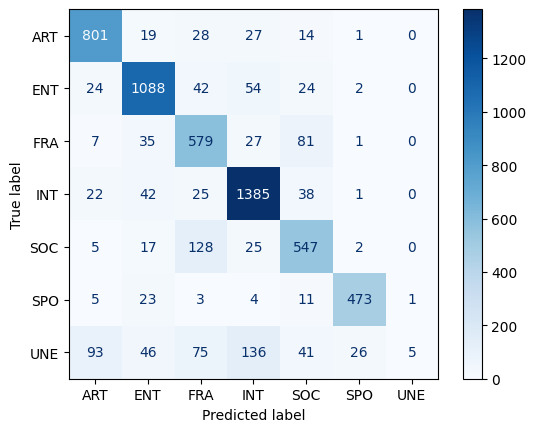

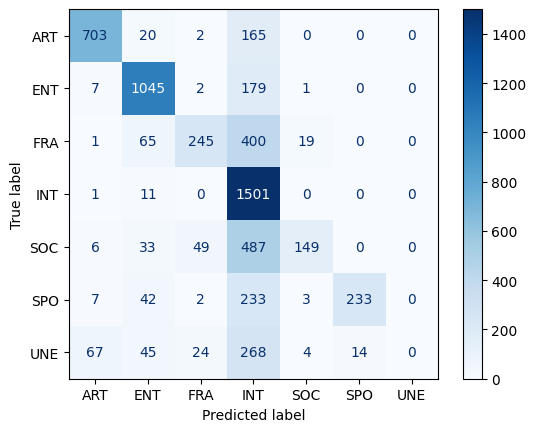

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# YOUR CODE HERE
report_1 = classification_report(y_test, y_pred)
report_2 = classification_report(y_test, y_pred_2)

cm_1 = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=model.classes_)
disp_1.plot(cmap="Blues", values_format="d") 

cm_2 = confusion_matrix(y_test, y_pred_2, labels=model.classes_)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp_2.plot(cmap="Blues", values_format="d") 

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

In [18]:
dataset['category'].unique()

array(['SPO', 'ART', 'FRA', 'SOC', 'INT', 'ENT', 'UNE'], dtype=object)

C:\Users\nourh\AppData\Local\Temp\ipykernel_132620\949194429.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].replace({'FRA': 'FRANCE_SOCIETE', 'SOC': 'FRANCE_SOCIETE'})


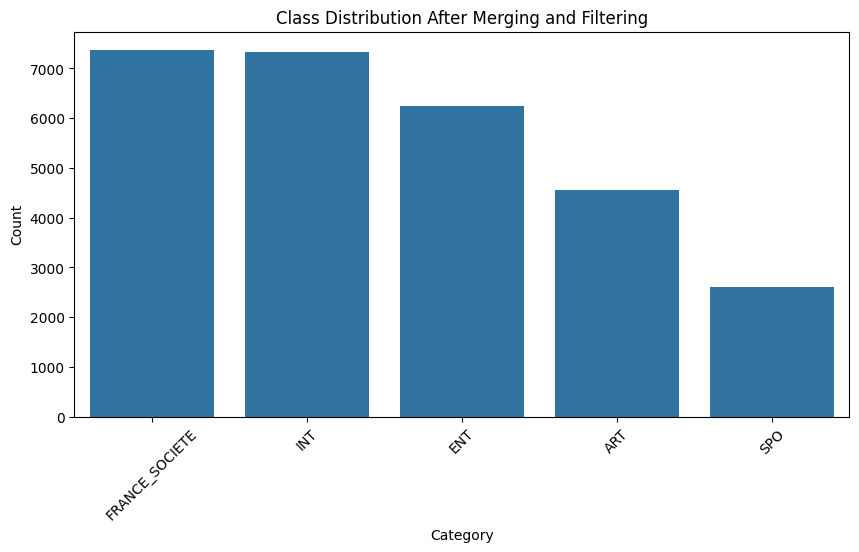

Training set size: 22488
Test set size: 5622
Accuracy: 0.8305
Confusion Matrix:
[[ 783   33   60   38    3]
 [  35 1011  135   66    4]
 [  45   78 1280   53    0]
 [  34   68  148 1264    1]
 [  42   35   56   19  331]]
Classification Report:
                precision    recall  f1-score   support

           ART       0.83      0.85      0.84       917
           ENT       0.83      0.81      0.82      1251
FRANCE_SOCIETE       0.76      0.88      0.82      1456
           INT       0.88      0.83      0.86      1515
           SPO       0.98      0.69      0.81       483

      accuracy                           0.83      5622
     macro avg       0.86      0.81      0.83      5622
  weighted avg       0.84      0.83      0.83      5622



In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

# Plot the statistics of classes

# Make the splits and print the sizes for checking

# Apply TfidfVectorizer

# Train MultinomialNB

# Print accuracy

# Print confusion matric


# Filter out the UNE class
df = dataset[dataset['category'] != 'UNE']

# Merge 'FRANCE' and 'SOCIETE' into a new class 'FRANCE_SOCIETE'
df['category'] = df['category'].replace({'FRA': 'FRANCE_SOCIETE', 'SOC': 'FRANCE_SOCIETE'})

# Plot the statistics of classes
plt.figure(figsize=(10, 5))
sns.countplot(x=df['category'], order=df['category'].value_counts().index)
plt.title("Class Distribution After Merging and Filtering")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Make the splits and print the sizes for checking
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

# ['ENT', 'INT',  'ART', 'SOC', 'FRA']

we want to do text classification : so we need a model accordingly 

In [ ]:
import time
import pandas as pd
from transformers import pipeline

# Load Zero-Shot Classification Pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define classification labels with semantic meaning
labels = [
    "Politics and Government", 
    "Business and Economy", 
    "Science and Technology", 
    "Health and Medicine", 
    "Sports and Entertainment", 
    "Culture and Society", 
    "International Affairs"
]

df = dataset.sample(100)  # Use 100 articles for testing

predictions, times = [], []

for text in df["text"]:
    text = text[:500]  # Use first 500 characters for speed
    start = time.time()
    result = classifier(text, labels)
    end = time.time()

    pred_class = result["labels"][0]  # Get top predicted class
    predictions.append(pred_class)
    times.append(end - start)

df["predicted_class"] = predictions
df["processing_time"] = times

# Compute accuracy if actual labels are available
if "actual_class" in df.columns:
    accuracy = (df["actual_class"] == df["predicted_class"]).mean()
    print(f"\nAccuracy: {accuracy:.2f}")

print(f"\nAvg Processing Time: {sum(times)/len(times):.2f} sec/article")
print("\nSample Predictions:")
print(df.head())

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Avg Processing Time: 0.22 sec/article

Sample Predictions:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            